In [1]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pandas as pd
import pickle  # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import tensorflow as tf
#
# from keras.layers import Dense, LSTM, Flatten, Dropout  # importing dense layer
# from keras.models import Sequential  # importing Sequential layer

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

# DATA PREPROCESSING

In [2]:
feature = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
           "hot",
           "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells",
           "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count",
           "serror_rate", "srv_serror_rate",
           "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
           "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
           "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]

train = '../DATA/nslkdd/KDDTrain+.txt'
test = '../DATA/nslkdd/KDDTest+.txt'
test21 = '../DATA/nslkdd/KDDTest-21.txt'
train_data = pd.read_csv(train, names=feature)
test_data = pd.read_csv(test, names=feature)
test_data21 = pd.read_csv(test21, names=feature)
data = pd.concat([train_data, test_data], ignore_index=True)

data['difficulty'].value_counts()



difficulty
21    73251
18    23634
20    20682
19    11174
15     5166
17     4242
16     3074
14     1410
12     1215
11     1102
13      970
10      448
7       367
9       300
6       253
8       237
0       189
5       184
3       181
4       180
1       149
2       109
Name: count, dtype: int64

In [3]:

data.drop(['difficulty'], axis=1, inplace=True)
data['label'].value_counts()

label
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm           

In [4]:

label = pd.DataFrame(data.label)

std_scaler = StandardScaler()

def standardization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr), 1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data, numeric_col)

le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data

(148517, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.112481,tcp,ftp_data,SF,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal,16
1,-0.112481,udp,other,SF,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,16
2,-0.112481,tcp,private,S0,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,neptune,14
3,-0.112481,tcp,http,SF,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal,16
4,-0.112481,tcp,http,SF,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,-0.112481,tcp,smtp,SF,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,...,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,16
148513,-0.112481,tcp,http,SF,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,...,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,normal,16
148514,-0.112481,tcp,http,SF,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,...,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,back,1
148515,-0.112481,udp,domain_u,SF,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,...,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal,16


In [5]:

data.drop(labels=['label'], axis=1, inplace=True)
print(data.shape)


(148517, 42)


In [6]:
# One-Hot Encoding
data = pd.get_dummies(
    data, columns=['protocol_type', 'service', 'flag'], prefix="", prefix_sep="")
print(data.shape)


(148517, 123)


In [7]:
y_data = data['intrusion']
X_data = data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:', X_data.shape, '\ny_train has shape:', y_data.shape)


X_train has shape: (148517, 122) 
y_train has shape: (148517,)


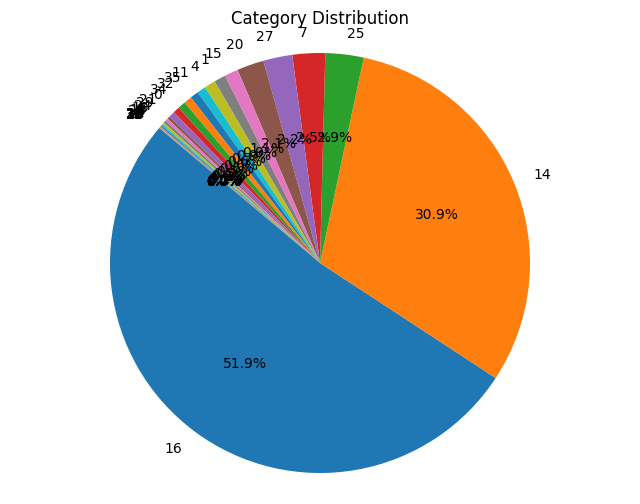

In [9]:
value_counts = y_data.value_counts()

# 绘制饼状图
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# One-Hot Encoding for y_data
y_data = LabelBinarizer().fit_transform(y_data)

y_data.shape


(148517, 40)

In [ ]:
X_data = np.array(X_data)
y_data = np.array(y_data)
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.20, random_state=42)
print(X_train.shape, '\n', X_test.shape)

(118813, 122) 
 (29704, 122)


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,-0.112481,-0.007206,-0.004525,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
1,-0.112481,-0.007371,-0.003469,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
2,-0.112481,-0.007266,-0.004525,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
3,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,True,False,False,False,False,False
4,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118808,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,True,False,False,False,False,False,False,False,False
118809,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,False,False,False,False,True,False,False,False,False,False
118810,-0.112481,-0.007436,-0.004592,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False
118811,-0.092161,-0.007395,-0.003908,-0.01468,-0.085488,-0.010403,0.402662,-0.059832,1.217658,-0.011473,...,False,False,False,False,False,False,False,False,True,False


In [51]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# define LSTM model

In [52]:


class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, seq_length):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim

        self.lstm1 = nn.LSTM(input_dim, hidden_dim, num_layers=2, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.lstm2 = nn.LSTM(hidden_dim, hidden_dim, num_layers=2, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.lstm3 = nn.LSTM(hidden_dim, hidden_dim, num_layers=2, batch_first=True)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(hidden_dim * seq_length, 50)
        self.fc2 = nn.Linear(50, output_dim)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x)
        x, _ = self.lstm3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return x




# Define model hyperparameters

In [54]:

# 定义模型超参数
input_dim = X_train.shape[2]  # 输入特征数量
hidden_dim = 64  # LSTM 隐藏层单元数量
output_dim = 40  # 输出类别数量
seq_length = 1  # 序列长度
# 初始化模型
model = LSTMModel(input_dim, hidden_dim, output_dim, seq_length)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 等效于 categorical_crossentropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 输出模型结构
print(model)

# 查看模型参数总数
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")

LSTMModel(
  (lstm1): LSTM(122, 64, num_layers=2, batch_first=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (lstm2): LSTM(64, 64, num_layers=2, batch_first=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (lstm3): LSTM(64, 64, num_layers=2, batch_first=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=40, bias=True)
)
Total trainable parameters: 219818


In [55]:

# training the model on training dataset
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')  # 对于回归任务
y_train = np.argmax(y_train, axis=1)  # 转换为类别索引
y_test = np.argmax(y_test, axis=1)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # 输入
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # 分类标签 (CrossEntropyLoss 不需要 one-hot 编码)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 创建数据加载器
batch_size = 5000
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_train_tensor, y_train_tensor)  # 可拆分 train/val
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# train functions

In [56]:

# 定义训练函数
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    model.to(device)
    history = {"accuracy": [], "loss": [], "val_loss": [], "val_accuracy": []}

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            # print(f"outputs.shape: {outputs.shape}, outputs.dtype: {outputs.dtype}")
            # print(f"y_batch.shape: {y_batch.shape}, y_batch.dtype: {y_batch.dtype}")
            # y_batch = torch.argmax(y_batch, dim=1)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

        train_loss /= len(train_loader)
        train_accuracy = correct / total  # 计算训练集准确率
        history["loss"].append(train_loss)
        history["accuracy"].append(train_accuracy)

        # 验证
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                outputs = model(X_val)
                loss = criterion(outputs, y_val)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y_val).sum().item()
                total += y_val.size(0)

        val_loss /= len(val_loader)
        val_accuracy = correct / total
        history["val_loss"].append(val_loss)
        history["val_accuracy"].append(val_accuracy)

        print(
            f"Epoch [{epoch + 1}/{epochs}] - Train Loss: {train_loss:.4f} - "
            f"Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}"
        )

    return history



# test functions

In [75]:

# 定义评估函数
def evaluate_model(model, test_loader, criterion):
    model.to(device)
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_test, y_test in test_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            outputs = model(X_test)
            loss = criterion(outputs, y_test)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_test).sum().item()
            total += y_test.size(0)

            # 收集所有真实标签和预测标签
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(y_test.cpu().numpy())

    test_loss /= len(test_loader)
    test_accuracy = correct / total
    print(f"Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy * 100:.2f}%")
    print(classification_report(all_labels, all_preds, digits=4))

    
    return test_loss, test_accuracy



# Run the training and evaluation functions

In [ ]:

# 训练模型
epochs = 100
history = train_model(model, train_loader, val_loader, criterion, optimizer, epochs)




Epoch [1/100] - Train Loss: 3.5112 - Val Loss: 3.2103 - Val Accuracy: 0.5185
Epoch [2/100] - Train Loss: 2.2448 - Val Loss: 1.5390 - Val Accuracy: 0.5185
Epoch [3/100] - Train Loss: 1.3905 - Val Loss: 1.3239 - Val Accuracy: 0.5185
Epoch [4/100] - Train Loss: 1.2899 - Val Loss: 1.2548 - Val Accuracy: 0.5185
Epoch [5/100] - Train Loss: 1.2244 - Val Loss: 1.1827 - Val Accuracy: 0.5166
Epoch [6/100] - Train Loss: 1.1342 - Val Loss: 1.0623 - Val Accuracy: 0.5245
Epoch [7/100] - Train Loss: 0.9724 - Val Loss: 0.8606 - Val Accuracy: 0.7929
Epoch [8/100] - Train Loss: 0.7938 - Val Loss: 0.7393 - Val Accuracy: 0.7981
Epoch [9/100] - Train Loss: 0.7133 - Val Loss: 0.6836 - Val Accuracy: 0.8009
Epoch [10/100] - Train Loss: 0.6675 - Val Loss: 0.6480 - Val Accuracy: 0.8039
Epoch [11/100] - Train Loss: 0.6374 - Val Loss: 0.6225 - Val Accuracy: 0.8049
Epoch [12/100] - Train Loss: 0.6145 - Val Loss: 0.6025 - Val Accuracy: 0.8092
Epoch [13/100] - Train Loss: 0.5956 - Val Loss: 0.5841 - Val Accuracy: 0.

In [76]:
# 评估模型
test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)


Test Loss: 0.0673 - Test Accuracy: 98.40%
              precision    recall  f1-score   support

           0     1.0000    0.9933    0.9967       150
           1     0.9604    0.9852    0.9727       271
           2     0.0000    0.0000    0.0000        11
           4     0.9713    0.9753    0.9733       243
           5     0.6818    0.9375    0.7895        32
           6     0.0000    0.0000    0.0000         3
           7     0.9829    0.9885    0.9857       698
           8     0.0000    0.0000    0.0000         9
           9     0.0000    0.0000    0.0000         2
          10     0.9074    0.9800    0.9423        50
          11     0.9814    0.9814    0.9814       215
          12     0.0000    0.0000    0.0000         4
          13     0.0000    0.0000    0.0000         5
          14     0.9998    0.9999    0.9998      9147
          15     0.8525    0.9369    0.8927       333
          16     0.9890    0.9906    0.9898     15450
          17     0.0000    0.0000    0.

d:\environment\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\environment\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\environment\anaconda3\envs\gan\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# display the test loss and accuracy

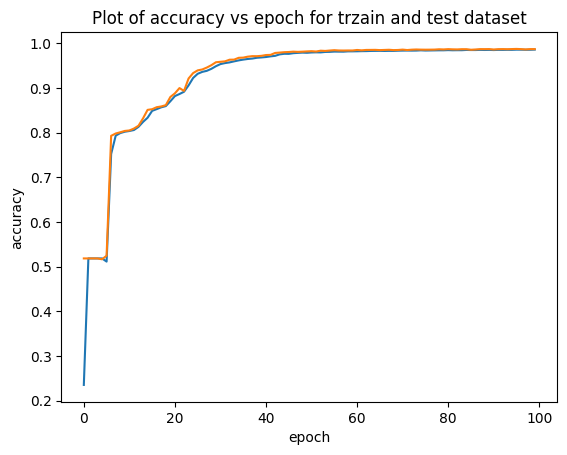

In [ ]:

# Plot of accuracy vs epoch for train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for trzain and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig(f'lstm_accuracy_{output_dim}.png')
plt.show()


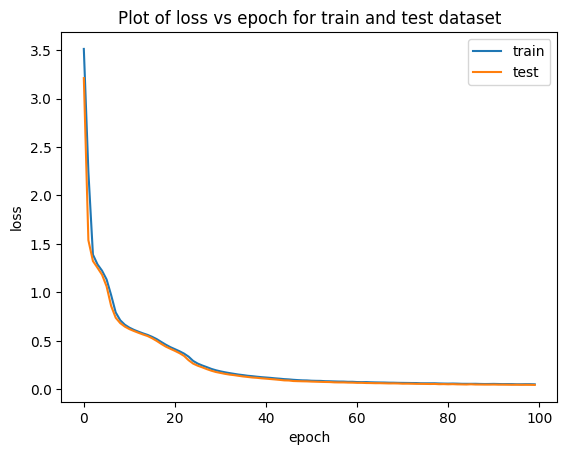

In [62]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig(f'lstm_loss_{output_dim}.png')
plt.show()